<a href="https://colab.research.google.com/github/sken3s/singlish-tweet-sentiment-analysis/blob/main/Sentiment_Analysis_of_Singhlish_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Singlish Tweets

## 184119E - Peniel W.A.A.D.S

# Setup

Installing required libraries

In [ ]:
!pip install sinling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.0 MB 6.2 MB/s 
     |████████████████████████████████| 240 kB 62.0 MB/s 
     |████████████████████████████████| 965 kB 46.2 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234927 sha256=1c2ad0c6ef3cca5f935a4d3d27f1647d0a8cd48c538e39c28fe163e05419e026
  Stored in directory: /root/.cache/pip/wheels/f3/e3/f2/1de1c2e3ed742e1df73e0f15d58864e50c7e64f607b548d6cf
Successfully built emoji


In [ ]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 1.4 MB 38.2 MB/s 
     |████████████████████████████████| 65 kB 3.6 MB/s 
     |████████████████████████████████| 53 kB 2.4 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16370 sha256=46a92258149265b3cffacf92e246e61d51ece039601aa984b10fa699b881db0c
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


Importing necessary libraries and modules

In [ ]:
import pandas as pd
import numpy as np
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
import re                                  # library for regular expression operations
import string                              # for string operations

from sinling import SinhalaStemmer, SinhalaTokenizer, POSTagger #sinhala stemming, tokenizing and POS tagging modules
#https://github.com/ysenarath/sinling
from sinling import preprocess, word_joiner #preprocessing and word joining modules
from sinling import word_splitter

from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings
from googletrans import Translator         # module for translate 

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

Import required stopwords and punctuations

In [ ]:
# stopwords taken from https://github.com/nlpcuom/Sinhala-Stopword-list
with open('/content/drive/MyDrive/Colab Notebooks/NLP/stop_words.txt') as f:
    stop_words = [line.rstrip('\n') for line in f]


from string import punctuation

punctuation = list(punctuation)
#adding punctions not available in the list
punctuation.append('“') 
punctuation.append('”')


# The Dataset

The dataset consists of 1022 singlish tweets for influential people in Sri Lanka labled as Positive or Negative based on its impact to society. This dataset was compiled together by Batch 18 of the IT Faculty of the University of Moratuwa

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/PublicFigureStatementsSinglish.csv",encoding="utf-16")
df.head(10)

,Statement,Impact,StateLength
0,මම නුවරඑළියේ ඉදන් කොළඹට ඇවිල්ලා ගායකයෙක් වෙන්න...,Positive,403
1,අද උදේ දැකපු සුන්දර දර්ශණයක්. නුගේගොඩ St.Johns...,Positive,298
2,"Smoking is a bad habit \nMenda , Danee🏏✌.\nCri...",Positive,91
3,හෙළPay for Business\r\niOS App එක මේ වන විට Ap...,Positive,112
4,Shooting වලට නුවර ගියපු මගේ හිත ගිය තැනක්.. ❤️...,Positive,359
5,මේ ලස්සන අහිංසක මුහුනු වලට හිනාවක් ගේන්න අපිට ...,Positive,386
6,හෙට දිනයේ ආරම්භ වන ආසියානු කුසලාන ක්‍රිකට් තරඟ...,Positive,170
7,අරගලයේ නියමුවන් දඩයම නවතනු !! \nLive video එකක...,Negative,412
8,අපි අප්පච්චි වටේ ආඩම්බරෙන් ඉන්නවා වගේ එයා සුව ...,Negative,270
9,බ්‍රහ්මාස්ත්‍ර චිත්‍රපටියේ “කේසරියා” සිංදුවට c...,Positive,362


## Visualise the dataset

In [ ]:
#seperate the tweets as positive and negative
positive_tweets = df[df['Impact'] == 'Positive']
negative_tweets = df[df['Impact'] == 'Negative']

print('Number of positive tweets: ', len(positive_tweets))
print('Number of negative tweets: ', len(negative_tweets))

Number of positive tweets:  517
Number of negative tweets:  505


In [ ]:
#seperate extract only the tweet
tweets_positive = positive_tweets['Statement'].tolist()
tweets_negative = negative_tweets['Statement'].tolist()

In [ ]:
print("This is a positive tweet: \n",tweets_positive[0])
print("This is a negative tweet: \n",tweets_negative[0])

This is a positive tweet: 
 මම නුවරඑළියේ ඉදන් කොළඹට ඇවිල්ලා ගායකයෙක් වෙන්න උත්සාහ කරන කෙනෙක්. Roshan fernando අයියා  කියන්නේ සංගීත ක්ෂේත්‍රයේ අවුරුදු ගාණක් අත්දැකීම් තියෙන එළිමහන් කණ්ඩායම් සංගීතයේ legend කෙනෙක්. ප්‍රථම වතාවට ෆ්ලෑෂ් බැක් ශබ්දාගාරයට ගියා practice වලට.

මෙහෙම ආදරණීය පිළිගැනීමක් සහ සහෝදරයන් පිරිසක් හමුවීමට ලැබීම ද මගේ ජීවිතයේ සතුටක් භාග්‍යයක්..

ඒ හැමදෙනාම සුන්දර මිනිසුන්.
අපි වේදිකාවේ දී අපි අපිව බෙදාගමු...බදා ගමු
This is a negative tweet: 
 අරගලයේ නියමුවන් දඩයම නවතනු !! 
Live video එකක් පදනම් කරගෙන පුද්ගලයෙකු අත්අඩංගුවට ගත හැකිනම්, වීඩියෝ වල රාජපක්ෂ, වික්‍රමසිංහලාගෙ සොරකම් ඝාතන පිලිඹද ඕනෑතරම් කියා ඇත. මුලින්ම උං අත්අඩංගුවට ගත යුතුයි. 
මතවාද ගැටුනු තැන් තිබුනත් සමාජ යුක්තිය වෙනුවෙන් පෙනීසිටි අරගලකරු Pathum Kerner වෙනුවෙන් යුක්තිය ඉටුවන තුරු කොන්දේසි විරහිතව පෙනී සිටිමි ! 
අනීතික අත්අඩංගුවට ගැනීම් තුලින් අරගලය මර්ධනය නවතනු !! 
#releasepathumkerner


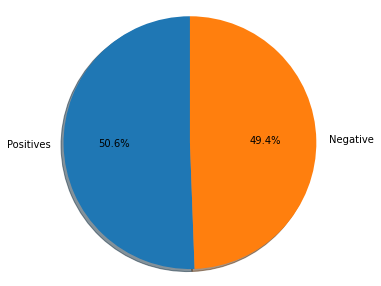

In [ ]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(positive_tweets), len(negative_tweets)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

In [ ]:
df_x = df['Statement']
df_y = df['Impact']

In [ ]:
df_x.head(10)

0    මම නුවරඑළියේ ඉදන් කොළඹට ඇවිල්ලා ගායකයෙක් වෙන්න...
1    අද උදේ දැකපු සුන්දර දර්ශණයක්. නුගේගොඩ St.Johns...
2    Smoking is a bad habit \nMenda , Danee🏏✌.\nCri...
3    හෙළPay for Business\r\niOS App එක මේ වන විට Ap...
4    Shooting වලට නුවර ගියපු මගේ හිත ගිය තැනක්.. ❤️...
5    මේ ලස්සන අහිංසක මුහුනු වලට හිනාවක් ගේන්න අපිට ...
6    හෙට දිනයේ ආරම්භ වන ආසියානු කුසලාන ක්‍රිකට් තරඟ...
7    අරගලයේ නියමුවන් දඩයම නවතනු !! \nLive video එකක...
8    අපි අප්පච්චි වටේ ආඩම්බරෙන් ඉන්නවා වගේ එයා සුව ...
9    බ්‍රහ්මාස්ත්‍ර චිත්‍රපටියේ “කේසරියා” සිංදුවට c...
Name: Statement, dtype: object

# Preprocessing dataset

In [ ]:
tweets = df_x[:50].copy() #taking a small subset of dataset to test preprocessing preprocessing

## Defining required functions

In [ ]:
#function to clean tweet using regulare expressions

def clean_tweet(tweet):
   # remove old style retweet text "RT"
    tweetRT = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    tweetHL = re.sub(r'&quot;+', '', tweetRT)

    # only removing the &#10; sign from the word
    tweet2 = re.sub(r'&#10;+', '', tweetHL)

    # remove hyperlinks
    tweet3 = re.sub(r'(http[s]?:\/\/)?(www)?\.[\w]+\.[\w]{2,3}(\/\w*)*', '', tweet2)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet4 = re.sub(r'#{1}', '', tweet3)

    # remove unicode
    tweet5 = tweet4.replace(r'\/u[0-9]{3}d','')

    return tweet5

In [ ]:
#main function to process tweet

def process_tweet(tweet):

#initialize tokenizer, translator, and stemmer
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    translator = Translator()
    stemmer = SinhalaStemmer() 

    tweet = clean_tweet(tweet) #clean tweet
    tweet = tokenizer.tokenize(tweet) #tokenize tweet


#loop through each word, translate it to Sinhala, remove stop words and punctuations, and stem the word
    for word in range(len(tweet)):
        translated = translator.translate(tweet[word], dest='si')
        tweet[word] = translated.text
    tweet = [token for token in tweet if token not in stop_words and token not in punctuation]
    processed_tweet = []
    for word in tweet:
        stem_word = stemmer.stem(word)
        processed_tweet.append(stem_word[0])
    return processed_tweet


Test preprocessing functions

In [ ]:
for index in tweets.index:
  tweets[index] = process_tweet(tweets[index])

In [ ]:
tweets

0     [ම, නුවරඑළි, ඉද, කොළඹ, ඇවි, ගායක, වෙ, උත්සාහ, ...
1     [අ, උද, දැක, සුන්දර, දර්ශණ, නුගේගොඩ, st.johns,...
2     [දුම්පානය කරන, , නරක, පුරුද්, මම අනුමාන කර, da...
3     [හෙළpay, සදහ, ව්යාපාරික, ios, යෙද, එක, ඇපල, අන...
4     [වෙඩි තැබ, , නුවර, ගිය, ම, හිත, ග, තැන, .., ❤,...
5     [ලස්ස, අහිංසක, මුහු, , හිනා, ගේ, අපි, පුලු, වු...
6     [හෙ, දින, ආරම්භ, ආසියා, කුසලා, ක්‍රිකට, තරඟාවල...
7     [අරගල, නියමු, දඩය, නවත, සජීවි, වීඩි, එ, පදන, ක...
8     [අපි, අප්පච්චි, වට, ආඩම්බර, ඉන්, , එ, ස, වෙනක,...
9     [බ්‍රහ්මාස්ත්‍ර, චිත්‍රපටි, කේසරි, සිංදු, ආවරණ...
10    [එකා, එ, ර, දිනව, එක්, එක, කර, රැල, අ, අප, සිං...
11    [පහත වැට, ගෙදර, ගි, නැත්න, රට, මිනිස්ස, ඩොලර, ...
12    [දේශපාලනඥ, විකෘ, vip, හැසිර, සමාජ, මාධ්‍, අවකා...
13    [imf, කිඹුල, කඳුළ, උද්ඝෝෂක, පිරිස, ඉ, වටපිටා, ...
14    [ම, අභියෝග, ඔව්, ශානක, බු, රාජපක්ෂ, බිහිසුණු ල...
15    [තිබ, විනෝදාංශ, උපකාර කර, සදහ, වඩා හොඳ, මානසික...
16    [, ආදර, කර, හැමදෙනා, බොහො, ස්තූත, ම, youtube, ...
17    [යුගල, , මා, එක්ක, ම, හාදක, ගීත, අමාර, කොට

# Building Word Frequency Dictionary

In [ ]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1    
    return freqs

In [ ]:
# concatenate the lists, 1st part is the positive tweets followed by the negative
final_tweet = tweets_positive + tweets_negative

In [ ]:
# make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(positive_tweets))), np.zeros((len(negative_tweets))))

In [ ]:
# create frequency dictionary
freqs = build_freqs(final_tweet, labels)

In [ ]:
freqs

{('ම', 1.0): 264,
 ('නුවරඑළි', 1.0): 1,
 ('ඉද', 1.0): 8,
 ('කොළඹ', 1.0): 8,
 ('ඇවි', 1.0): 3,
 ('ගායක', 1.0): 4,
 ('වෙ', 1.0): 84,
 ('උත්සාහ', 1.0): 2,
 ('කර', 1.0): 268,
 ('කෙන', 1.0): 23,
 ('රොෂා', 1.0): 1,
 ('ප්\u200dරනාන්ද', 1.0): 1,
 ('අයි', 1.0): 6,
 ('කිය', 1.0): 93,
 ('සංගීත', 1.0): 20,
 ('ක්ෂේත්\u200dර', 1.0): 2,
 ('අවුරුද', 1.0): 9,
 ('ගාණ', 1.0): 1,
 ('අත්දැක', 1.0): 8,
 ('තියෙ', 1.0): 39,
 ('එළිමහ', 1.0): 1,
 ('කණ්ඩාය', 1.0): 18,
 ('පුරාවෘත්ත', 1.0): 2,
 ('ප්\u200dරථ', 1.0): 5,
 ('වතා', 1.0): 4,
 ('ෆ්ලෑෂ', 1.0): 1,
 ('බැ', 1.0): 2,
 ('ශබ්දාගාර', 1.0): 2,
 ('ගි', 1.0): 7,
 ('පුරුදු කර', 1.0): 3,
 ('', 1.0): 281,
 ('මෙහෙ', 1.0): 3,
 ('ආදරණ', 1.0): 23,
 ('පිළිගැන', 1.0): 1,
 ('සහෝදර', 1.0): 7,
 ('පිරිස', 1.0): 9,
 ('හමුව', 1.0): 4,
 ('ලැබ', 1.0): 12,
 ('ජීවිත', 1.0): 43,
 ('සතුට', 1.0): 26,
 ('භාග්\u200dය', 1.0): 2,
 ('..', 1.0): 102,
 ('හැමදෙනා', 1.0): 8,
 ('සුන්දර', 1.0): 3,
 ('මිනිස', 1.0): 15,
 ('අපි', 1.0): 90,
 ('වේදික', 1.0): 1,
 ('බෙදාග', 1.0): 16,
 ('...', 1.0): 87,
 

In [ ]:
# split the data into two pieces, one for training and one for testing (validation set)
test_pos = tweets_positive[400:]
train_pos = tweets_positive[:400]
test_neg = tweets_negative[400:]
train_neg = tweets_negative[:400]

train_x = train_pos + train_neg
test_x = test_pos + test_neg

# avoid assumptions about the length of all_positive_tweets
train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))
test_y = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))

In [ ]:
def lookup(freqs, word, label):
    '''
    Input:
        freqs: a dictionary with the frequency of each pair (or tuple)
        word: the word to look up
        label: the label corresponding to the word
    Output:
        n: the number of times the word with its corresponding label appears.
    '''
    n = 0  # freqs.get((word, label), 0)

    n = freqs.get((word, label), 0)

    return n

In [ ]:
def train_naive_bayes(freqs, train_x, train_y):
    '''
    Input:
        freqs: dictionary from (word, label) to how often the word appears
        train_x: a list of tweets
        train_y: a list of labels correponding to the tweets (0,1)
    Output:
        logprior: the log prior. (equation 3 above)
        loglikelihood: the log likelihood of you Naive bayes equation.
    '''
    loglikelihood = {}
    logprior = 0

    # calculate V, the number of unique words in the vocabulary
    vocab = set([pair[0] for pair in freqs.keys()])
    V = len(vocab)

    # calculate N_pos, N_neg, V_pos, V_neg
    N_pos = N_neg = V_pos = V_neg = 0
    
    for pair in freqs.keys():
        # if the label is positive (greater than zero)
        if pair[1] > 0:
            # increment the count of unique positive words by 1
            V_pos += 1

            # Increment the number of positive words by the count for this (word, label) pair
            N_pos += freqs[pair]

        # else, the label is negative
        else:
            # increment the count of unique negative words by 1
            V_neg += 1

            # increment the number of negative words by the count for this (word,label) pair
            N_neg += freqs[pair]

    # Calculate D, the number of documents
    D = len(train_y)

    # Calculate D_pos, the number of positive documents
    D_pos = (len(list(filter(lambda x: x > 0, train_y))))

    # Calculate D_neg, the number of negative documents
    D_neg = (len(list(filter(lambda x: x <= 0, train_y))))

    # Calculate logprior
    logprior = np.log(D_pos) - np.log(D_neg)

    # For each word in the vocabulary...
    for word in vocab:
        # get the positive and negative frequency of the word
        freq_pos = lookup(freqs,word,1)
        freq_neg = lookup(freqs,word,0)

        # calculate the probability that each word is positive, and negative
        p_w_pos = (freq_pos + 1) / (N_pos + V)
        p_w_neg = (freq_neg + 1) / (N_neg + V)

        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos/p_w_neg)

    return logprior, loglikelihood

In [ ]:
logprior, loglikelihood = train_naive_bayes(freqs, train_x, train_y)

print(logprior)
print(len(loglikelihood))

0.0
5602


In [ ]:
def naive_bayes_predict(tweet, logprior, loglikelihood):
    '''
    Input:
        tweet: a string
        logprior: a number
        loglikelihood: a dictionary of words mapping to numbers
    Output:
        p: the sum of all the logliklihoods of each word in the tweet (if found in the dictionary) + logprior (a number)

    '''
    # process the tweet to get a list of words
    word_l = process_tweet(tweet)

    # initialize probability to zero
    p = 0

    # add the logprior
    p += logprior

    for word in word_l:

        # check if the word exists in the loglikelihood dictionary
        if word in loglikelihood:
            # add the log likelihood of that word to the probability
            p += loglikelihood[word]

    return p

In [ ]:
def test_naive_bayes(test_x, test_y, logprior, loglikelihood):
    """
    Input:
        test_x: A list of tweets
        test_y: the corresponding labels for the list of tweets
        logprior: the logprior
        loglikelihood: a dictionary with the loglikelihoods for each word
    Output:
        accuracy: (# of tweets classified correctly)/(total # of tweets)
    """
    accuracy = 0  # return this properly

    y_hats = []
    for tweet in test_x:
        # if the prediction is > 0
        if naive_bayes_predict(tweet, logprior, loglikelihood) > 0:
            # the predicted class is 1
            y_hat_i = 1
        else:
            # otherwise the predicted class is 0
            y_hat_i = 0

        # append the predicted class to the list y_hats
        y_hats.append(y_hat_i)

    # error is the average of the absolute values of the differences between y_hats and test_y
    error = np.mean(np.absolute(y_hats-test_y))

    # Accuracy is 1 minus the error
    accuracy = 1 - error

    return accuracy

# Testing Model

In [ ]:
print("Naive Bayes accuracy = %0.4f" % (test_naive_bayes(test_x, test_y, logprior, loglikelihood)))

Naive Bayes accuracy = 0.9640


In [ ]:
# testing with any tweet
my_tweet = 'අපි ලස්සන students ❤️'

p = naive_bayes_predict(my_tweet, logprior, loglikelihood)
print(p)

8.040298565212668
